# CS4035 - Cyber Data Analytics
## Lab 3 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 3 contains 7 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

## Group Number :

## Student 1 
### Name :
### ID :

## Student 2
### Name :
### ID :

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style('grade3')

import warnings
warnings.filterwarnings('ignore')

## 1. Familiarization and discretization task – 1 A4

### 1a. Plot visualizations - Select and visualize two features for modeling the behavior of the infected host.

#### Load Data

In [2]:
# load data and print the first serveral
rawdata = pd.read_csv('./dataset/capture20110818.binetflow.txt')
rawdata.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/18 09:56:29.146156,2752.656250,udp,71.222.124.71,60621,<->,147.32.84.59,63550,CON,0.0,0.0,3,435,290,flow=Background-Established-cmpgw-CVUT
1,2011/08/18 09:56:42.630892,1849.315552,udp,78.234.54.245,51413,<->,147.32.84.59,63550,CON,0.0,0.0,3,417,272,flow=Background-Established-cmpgw-CVUT
2,2011/08/18 09:56:44.640650,2091.747314,udp,31.147.120.139,63195,<->,147.32.84.59,63550,CON,0.0,0.0,2,290,145,flow=Background-Established-cmpgw-CVUT
3,2011/08/18 10:10:52.782230,1535.769409,udp,118.5.35.64,39110,<->,147.32.84.59,63550,CON,0.0,0.0,2,290,145,flow=Background-Established-cmpgw-CVUT
4,2011/08/18 10:19:13.328372,0.002636,tcp,147.32.86.166,33426,<?>,212.24.150.110,25443,FRPA_FPA,0.0,0.0,6,490,321,flow=Background


In [3]:
print("data shape:", rawdata.shape)

data shape: (1309791, 15)


#### Background Flows Removed 

In [4]:
# remove background flows
source10 = rawdata[~rawdata.Label.str.contains("Background")]
source10.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
407,2011/08/18 10:19:15.693956,3587.569824,tcp,147.32.84.164,54784,<?>,74.125.232.215,443,PA_PA,0.0,0.0,3049,978731,245317,flow=From-Normal-V51-Grill
697,2011/08/18 10:19:18.143576,198.072739,tcp,147.32.84.164,56165,<?>,74.125.232.197,80,FA_FA,0.0,0.0,14,924,462,flow=From-Normal-V51-Grill
717,2011/08/18 10:19:18.303590,197.928329,tcp,147.32.84.164,57965,<?>,209.85.149.138,80,FA_FA,0.0,0.0,14,924,462,flow=From-Normal-V51-Grill
896,2011/08/18 10:19:19.838272,0.000399,udp,147.32.84.170,45807,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Normal-V51-Stribrek
897,2011/08/18 10:19:19.839123,0.000400,udp,147.32.84.170,35380,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Normal-V51-Stribrek


In [5]:
print("data shape:", source10.shape)

data shape: (122199, 15)


### 1b. Discretize selected features

Windows XP Name: SARUMAN,  IP: 147.32.84.165 (Label: Botnet)

Windows XP Name: SARUMAN1, IP: 147.32.84.191 (Label: Botnet)

Windows XP Name: SARUMAN2, IP: 147.32.84.192 (Label: Botnet)

Windows XP Name: SARUMAN3, IP: 147.32.84.193 (Label: Botnet)

Windows XP Name: SARUMAN4, IP: 147.32.84.204 (Label: Botnet)

Windows XP Name: SARUMAN5, IP: 147.32.84.205 (Label: Botnet)

Windows XP Name: SARUMAN6, IP: 147.32.84.206 (Label: Botnet)

Windows XP Name: SARUMAN7, IP: 147.32.84.207 (Label: Botnet)

Windows XP Name: SARUMAN8, IP: 147.32.84.208 (Label: Botnet)

Windows XP Name: SARUMAN9, IP: 147.32.84.209 (Label: Botnet)


In [6]:
# add label to the last column
Botnet = ["147.32.84.165","147.32.84.191","147.32.84.192","147.32.84.193","147.32.84.204","147.32.84.205","147.32.84.206","147.32.84.207","147.32.84.208","147.32.84.209"]
source10['Botnet'] = source10['SrcAddr'].isin(Botnet)

source10_botnet = source10[source10['Botnet'] == 1]
source10_benign = source10[source10['Botnet'] != 1]

print("Infected Flows Number:", len(source10_botnet))
print("Non-infected Flows Number:", len(source10_benign))

Infected Flows Number: 106352
Non-infected Flows Number: 15847


#### Selected Feature 1: Protocol

In [7]:
print("Infected:", np.unique(source10_botnet['Proto'], return_counts=True))
print()
print("Non-infected:", np.unique(source10_benign['Proto'], return_counts=True))

Infected: (array(['icmp', 'tcp', 'udp'], dtype=object), array([105977,     82,    293], dtype=int64))

Non-infected: (array(['arp', 'icmp', 'tcp', 'udp'], dtype=object), array([  11,  713, 5343, 9780], dtype=int64))


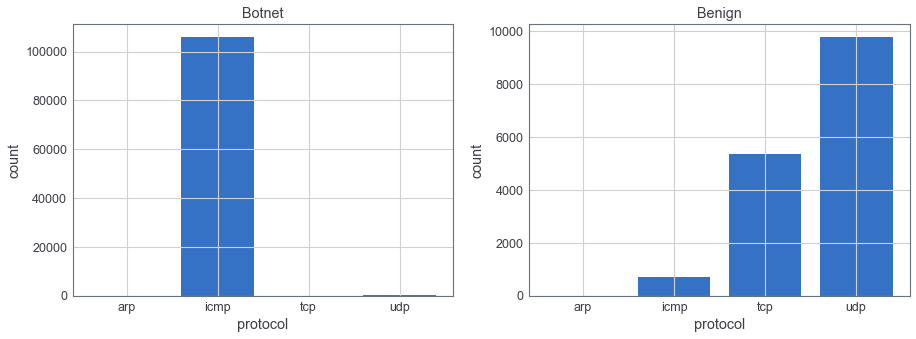

In [8]:
protocol_1 = np.unique(source10_botnet['Proto'], return_counts=True)[1]
protocol_1 = np.insert(protocol_1, 0, 0)
protocol_0 = np.unique(source10_benign['Proto'], return_counts=True)[1]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(['arp', 'icmp', 'tcp', 'udp'], [height for height in protocol_1])
plt.xlabel('protocol')
plt.ylabel('count')
plt.title("Botnet")
plt.subplot(1,2,2)
plt.bar(['arp', 'icmp', 'tcp', 'udp'], [height for height in protocol_0])
plt.xlabel('protocol')
plt.ylabel('count')
plt.title('Benign')
plt.show()

In [9]:
# encode protocol
protocol_encoder = {'arp': 0, 'udp': 1, 'tcp': 2, 'icmp': 3}
source10["Proto"].replace('arp', protocol_encoder['arp'], inplace=True)
source10["Proto"].replace('udp', protocol_encoder['udp'], inplace=True)
source10["Proto"].replace('tcp', protocol_encoder['tcp'], inplace=True)
source10["Proto"].replace('icmp', protocol_encoder['icmp'], inplace=True)

#### Selected Feature 2: Duration

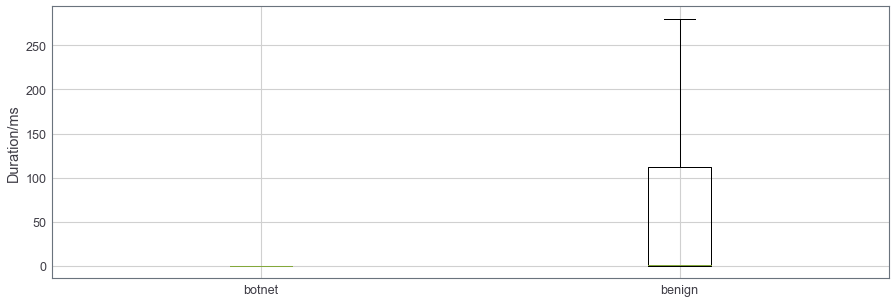

-botnet 
 mean: 90.82559153096368 std: 292.0150242011546

-benign 
 mean: 46.585669888622334 std: 301.2336573129555


In [10]:
plt.figure(figsize=(15, 5))
plt.boxplot(
    [source10_botnet["Dur"].values * 1e3, source10_benign["Dur"].values * 1e3],
    showfliers=False,
    labels=['botnet', 'benign'])
plt.ylabel("Duration/ms")
plt.show()

print("-botnet \n", "mean:", source10_botnet["Dur"].mean(), "std:",
      source10_botnet["Dur"].std())
print()
print("-benign \n", "mean:", source10_benign["Dur"].mean(), "std:",
      source10_benign["Dur"].std())

#### Combine to One

In [11]:
from sklearn.preprocessing import Normalizer, KBinsDiscretizer
from sklearn.decomposition import PCA
from scipy.stats import spearmanr

In [12]:
features = source10[['Dur', 'Proto']]
features.head()

,Dur,Proto
407,3587.569824,2
697,198.072739,2
717,197.928329,2
896,0.000399,1
897,0.000400,1


In [13]:
# normalization
norm = Normalizer().fit(features)
features_norm = norm.transform(features)

# pca conversion
pca = PCA(n_components=1)
feature_comb = pca.fit_transform(features_norm, y=source10['Botnet'].values).reshape(-1,1)

In [14]:
# select the best number of bins
spearman = []
for i in range(2,100):
    KBins = KBinsDiscretizer(n_bins=i, encode='ordinal', strategy='quantile')
    feature_disc = KBins.fit_transform(feature_comb)
    spearman.append(spearmanr(feature_disc, feature_comb)[0])

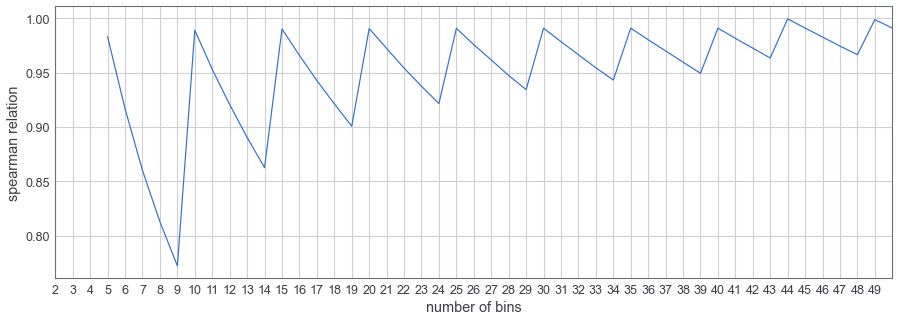

In [15]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(2,100), spearman)
plt.xlim([2,50])
plt.xticks(np.arange(2,50))
plt.xlabel("number of bins")
plt.ylabel("spearman relation")
plt.show()

In [16]:
feature_disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile').fit_transform(feature_comb)

source10['feature'] = feature_disc
source10.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Botnet,feature
407,2011/08/18 10:19:15.693956,3587.569824,2,147.32.84.164,54784,<?>,74.125.232.215,443,PA_PA,0.0,0.0,3049,978731,245317,flow=From-Normal-V51-Grill,False,2.0
697,2011/08/18 10:19:18.143576,198.072739,2,147.32.84.164,56165,<?>,74.125.232.197,80,FA_FA,0.0,0.0,14,924,462,flow=From-Normal-V51-Grill,False,2.0
717,2011/08/18 10:19:18.303590,197.928329,2,147.32.84.164,57965,<?>,209.85.149.138,80,FA_FA,0.0,0.0,14,924,462,flow=From-Normal-V51-Grill,False,2.0
896,2011/08/18 10:19:19.838272,0.000399,1,147.32.84.170,45807,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Normal-V51-Stribrek,False,1.0
897,2011/08/18 10:19:19.839123,0.000400,1,147.32.84.170,35380,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Normal-V51-Stribrek,False,1.0


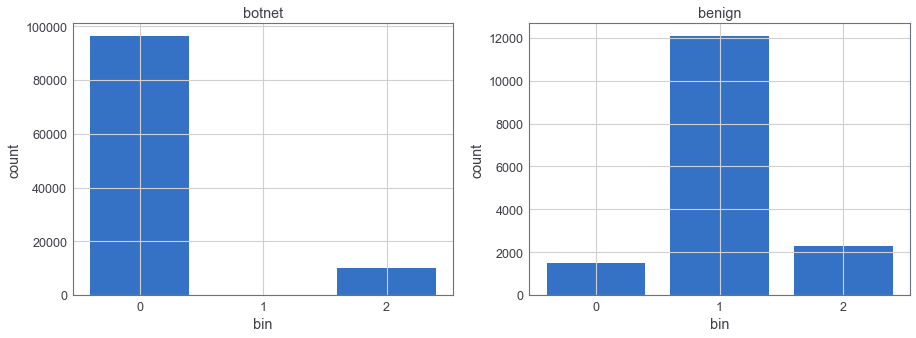

In [17]:
source10_botnet = source10[source10['Botnet'] == 1]
source10_benign = source10[source10['Botnet'] != 1]

botnet_result = np.unique(source10_botnet.feature.values, return_counts=True)
benign_result = np.unique(source10_benign.feature.values, return_counts=True)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.bar(botnet_result[0], botnet_result[1])
plt.xticks(botnet_result[0])
plt.xlabel("bin")
plt.ylabel("count")
plt.title("botnet")
plt.subplot(122)
plt.bar(benign_result[0], benign_result[1])
plt.xticks(benign_result[0])
plt.xlabel("bin")
plt.ylabel("count")
plt.title("benign")
plt.show()

### 1b. Answers and explanation

## 2. Frequent task – 1/2 A4 (Individual)

### 2a. Use the SPACE SAVING algorithm

### 2b. Analysis and answers to the questions

## 3. Sketching task – 1/2 A4 (Individual)

### 3a. COUNT-MIN sketch


In [18]:
from tqdm import tqdm
from hashlib import md5

In [19]:
height = 0
width = 0
hashTable = np.zeros([height, width]).astype(np.int64)

# initialize a hash table
def initHashTable(h, w):
    global height
    global width
    global hashTable

    height = h
    width = w
    hashTable = np.zeros([height, width])


# map the value to hash table
def addToHash(value):
    global width
    global height
    global hashTable
    
    for i in range(height):
        hashTable[i, int(md5(bytes(value * (2*i+1), encoding='utf8')).hexdigest(),16) % width] += 1

# retrive the width positions in the table
def retriveHash(value):
    global width
    global height

    return [(int(md5(bytes(value * (2*i+1), encoding='utf8')).hexdigest(),16) % width) for i in range(height)]


# count min
def count_min(value):
    global hashTable
    global height

    return np.min(hashTable[np.arange(height),
                            retriveHash(value)]).astype(np.int)


# clearHashTable
def clearHashTable():
    global hashTable

    hashTable = np.zeros([height, width])


# string concatenation
def concatenate(arr: np.array):
    string = ''
    for sub in arr:
        string += sub
    return string

In [20]:
# load the stream to memory
cm_stream = source10.feature.values.astype(np.int16).astype(np.str)

print("the first 10 values:", cm_stream[:10])

the first 10 values: ['2' '2' '2' '1' '1' '1' '2' '2' '2' '2']


In [21]:
# initialize actual count
dict_name = []
for i in ['0', '1', '2']:
    for j in ['0', '1', '2']:
        for k in ['0', '1', '2']:
            dict_name.append(i+j+k)
initial_value = np.zeros(3**3).astype(np.int32)
actual_count = dict(zip(dict_name, initial_value))

for i in range(len(cm_stream)-2):
    temp = concatenate(cm_stream[i:i+3])
    actual_count[temp] += 1
actual_top10 = sorted(actual_count.items(), key=lambda x:x[1], reverse=True)[:10]

err_top10 = []
height_width = []
for h in tqdm(range(1, 10)):
    for w in range(1,10):
        height_width.append([h,w])
        # initialize count-min sketching matrix
        initHashTable(h, w) # for different combination of width and height

        # counting
        for i in range(len(cm_stream)-2):
            temp = concatenate(cm_stream[i:i+3])
#             actual_count[temp] += 1
            addToHash(temp)

        temp = []
        for name_ in dict_name:
            temp.append(count_min(name_))
        cm_count = dict(zip(dict_name, temp))

        # compare
#         actual_top10 = sorted(actual_count.items(), key=lambda x:x[1], reverse=True)[:10]
        cm_top10 = sorted(cm_count.items(), key=lambda x:x[1], reverse=True)[:10]
        err_top10.append(np.sum(np.abs([actual_top10[i][1] - cm_top10[i][1] for i in range(10)])))

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [02:13<00:00, 14.86s/it]


In [22]:
for i in range(len(height_width)):
    print(height_width[i], err_top10[i])
print()
best_height_width = height_width[np.argmin(err_top10)]
print("best height and width:", best_height_width)

[1, 1] 1102145
[1, 2] 962955
[1, 3] 872635
[1, 4] 378303
[1, 5] 983485
[1, 6] 692369
[1, 7] 628211
[1, 8] 154646
[1, 9] 240513
[2, 1] 1102145
[2, 2] 774237
[2, 3] 307527
[2, 4] 42310
[2, 5] 135937
[2, 6] 160495
[2, 7] 76727
[2, 8] 18603
[2, 9] 21356
[3, 1] 1102145
[3, 2] 489222
[3, 3] 229660
[3, 4] 24041
[3, 5] 25381
[3, 6] 130992
[3, 7] 27062
[3, 8] 6180
[3, 9] 20988
[4, 1] 1102145
[4, 2] 292598
[4, 3] 147078
[4, 4] 15952
[4, 5] 23049
[4, 6] 103842
[4, 7] 15482
[4, 8] 5349
[4, 9] 3447
[5, 1] 1102145
[5, 2] 187733
[5, 3] 128221
[5, 4] 15011
[5, 5] 11753
[5, 6] 7566
[5, 7] 3648
[5, 8] 4184
[5, 9] 2322
[6, 1] 1102145
[6, 2] 82954
[6, 3] 126957
[6, 4] 13894
[6, 5] 8635
[6, 6] 6104
[6, 7] 3537
[6, 8] 3386
[6, 9] 2227
[7, 1] 1102145
[7, 2] 82954
[7, 3] 29993
[7, 4] 10898
[7, 5] 7821
[7, 6] 4817
[7, 7] 2774
[7, 8] 2553
[7, 9] 1924
[8, 1] 1102145
[8, 2] 74192
[8, 3] 20565
[8, 4] 9861
[8, 5] 5562
[8, 6] 4289
[8, 7] 2210
[8, 8] 1634
[8, 9] 1845
[9, 1] 1102145
[9, 2] 48898
[9, 3] 19518
[9, 4] 89

In [23]:
# example when height = 9 and width = 8, total error = 1359

initHashTable(9, 8)
# counting
for i in range(len(cm_stream) - 2):
    temp = concatenate(cm_stream[i:i + 3])
    addToHash(temp)

temp = []
for name_ in dict_name:
    temp.append(count_min(name_))
cm_count = dict(zip(dict_name, temp))

# compare
cm_top10 = sorted(cm_count.items(), key=lambda x: x[1], reverse=True)[:10]
err_top10 = np.abs([actual_top10[i][1] - cm_top10[i][1] for i in range(10)])
result = pd.DataFrame(
    np.array([[actual_top10[i][0] for i in range(10)],
              [actual_top10[i][1] for i in range(10)],
              [cm_top10[i][1] for i in range(10)], err_top10]).T, columns=['3-grams', 'actual', 'cm', 'error'])

In [24]:
result

,3-grams,actual,cm,error
0,000,96156,96156,0
1,222,10341,10718,377
2,111,8935,8935,0
3,211,971,1214,243
4,112,960,982,22
5,121,758,824,66
6,001,464,596,132
7,100,449,588,139
8,110,401,588,187
9,011,390,583,193


### 3b. Analysis and answers to the questions

## 4. Min-wise locality sensitive hashing task – 1/2 A4 (Individual)

### 4a. Implementation

### 4b. Analysis and answers to the questions

## 5. Random hyperplane locality sensitive hashing task – 1/2 A4 (Individual)

### 5a. Implementation - locality sensitive hashing

In [25]:
def aggregation():
    # group by pair of IP-addresses
    raw = list(source10[['SrcAddr', 'DstAddr', 'feature']].groupby(['SrcAddr', 'DstAddr']))
    # ip paris address list
    srcip_list = []
    dstip_list = []
    # feature list
    feature_list = []
    for i in range(len(raw)):
        srcip_list.append(raw[i][0][0])
        dstip_list.append(raw[i][0][1])
        feat_temp = raw[i][1].feature.values.astype(int).astype(str)
        string_temp = ''
        for j in range(len(feat_temp)):
            string_temp += feat_temp[j]
        feature_list.append(string_temp)
    
    return srcip_list, dstip_list, feature_list

alltrigram = []
for i in ['0', '1', '2']:
    for j in ['0', '1', '2']:
        for k in ['0', '1', '2']:
            alltrigram.append(i+j+k)
count_index = np.arange(0,len(alltrigram))
dict_index = dict(zip(alltrigram, count_index))

In [26]:
srcip_list, dstip_list, feature_list = aggregation()
rh_data = pd.DataFrame()
rh_data['Source'] = srcip_list
rh_data["Destination"] = dstip_list
rh_data["Feature"] = feature_list
rh_data['Count'] = [[0]*27 for _ in range(len(rh_data))]
rh_data

,Source,Destination,Feature,Count
0,147.32.1.20,147.32.85.20,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,147.32.1.20,147.32.85.7,00000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,147.32.1.20,147.32.85.8,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,147.32.1.20,147.32.86.135,00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,147.32.1.20,147.32.86.155,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
552,147.32.87.36,147.32.87.33,2222,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
553,147.32.87.36,66.249.66.211,210211111,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
554,147.32.87.36,66.249.72.152,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
555,147.32.87.36,66.249.72.228,221,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [27]:
# counting trigram
for i in range(len(rh_data)):
    temp_string = rh_data.Feature[i]
    if(len(temp_string) >=3 ):
        for j in range(len(temp_string)-2):
            rh_data['Count'][i][dict_index[temp_string[j:j+3]]] += 1
            
rh_data

,Source,Destination,Feature,Count
0,147.32.1.20,147.32.85.20,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,147.32.1.20,147.32.85.7,00000,"[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,147.32.1.20,147.32.85.8,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,147.32.1.20,147.32.86.135,00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,147.32.1.20,147.32.86.155,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
552,147.32.87.36,147.32.87.33,2222,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
553,147.32.87.36,66.249.66.211,210211111,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, ..."
554,147.32.87.36,66.249.72.152,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
555,147.32.87.36,66.249.72.228,221,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [28]:
# creating hyperplanes
n_hyperplanes = 3
output_size = 2 # 00 01 10 11

random_hyperplanes = []
for i in range(n_hyperplanes):
    hyperplane = np.random.randn(output_size, 27)
    random_hyperplanes.append(hyperplane)

In [29]:
# map to smaller size bins
rh_hash = []
for i in range(len(rh_data)):
    temp_hash = []
    for hyperplane in random_hyperplanes:
        temp_hash.append((np.dot(hyperplane,rh_data.Count[i]) > 1).dot([1,2]))
    rh_hash.append(temp_hash)

rh_data["Hash"] = rh_hash
rh_data

,Source,Destination,Feature,Count,Hash
0,147.32.1.20,147.32.85.20,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0]"
1,147.32.1.20,147.32.85.7,00000,"[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 2, 2]"
2,147.32.1.20,147.32.85.8,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0]"
3,147.32.1.20,147.32.86.135,00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0]"
4,147.32.1.20,147.32.86.155,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0]"
...,...,...,...,...,...
552,147.32.87.36,147.32.87.33,2222,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 2]"
553,147.32.87.36,66.249.66.211,210211111,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, ...","[0, 2, 2]"
554,147.32.87.36,66.249.72.152,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0]"
555,147.32.87.36,66.249.72.228,221,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0]"


#### Run-time Comparison

In [30]:
import time

In [31]:
print('Original Run-time:')
start = time.time()
allDistance = np.zeros([len(rh_data), len(rh_data)])
for i in range(len(rh_data)):
    for j in range(i+1, len(rh_data)):
        distance = np.linalg.norm(np.array(rh_data.Count[i])-np.array(rh_data.Count[j]), ord=2)
        allDistance[i][j] = allDistance[j][i] = distance
end = time.time()
print('\tTotal time:', end-start)

print()

print('N-gram Smaller Space Run-time:')
strat = time.time()
allDistance = np.zeros([len(rh_data), len(rh_data)])
rh_hash = []
for i in range(len(rh_data)):
    temp_hash = []
    for hyperplane in random_hyperplanes:
        temp_hash.append((np.dot(hyperplane,rh_data.Count[i]) > 1).dot([1,2]))
    rh_hash.append(temp_hash)
end = time.time()
t1 = end-start
print('\tTime for mapping:', t1)
start = time.time()
for i in range(len(rh_hash)):
    for j in range(i+1, len(rh_hash)):
        distance = np.linalg.norm(np.array(rh_hash[i])-np.array(rh_hash[j]), ord=2)
        allDistance[i][j] = allDistance[j][i] = distance
end = time.time()
t2 = end-start
print('\tTime for distance calculation:', t2)
print('\tTotal time:', t1+t2)

Original Run-time:
	Total time: 3.9210774898529053

N-gram Smaller Space Run-time:
	Time for mapping: 3.951071262359619
	Time for distance calculation: 1.3876209259033203
	Total time: 5.3386921882629395


In [32]:
label = []
for i in range(len(rh_data)):
    label.append(rh_data['Source'][i] in Botnet)
rh_data["Label"] = label
rh_data

,Source,Destination,Feature,Count,Hash,Label
0,147.32.1.20,147.32.85.20,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0]",False
1,147.32.1.20,147.32.85.7,00000,"[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 2, 2]",False
2,147.32.1.20,147.32.85.8,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0]",False
3,147.32.1.20,147.32.86.135,00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0]",False
4,147.32.1.20,147.32.86.155,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0]",False
...,...,...,...,...,...,...
552,147.32.87.36,147.32.87.33,2222,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 2]",False
553,147.32.87.36,66.249.66.211,210211111,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, ...","[0, 2, 2]",False
554,147.32.87.36,66.249.72.152,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0]",False
555,147.32.87.36,66.249.72.228,221,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0]",False


In [33]:
print('Botnet Hashing Result:')
eval_botnet = np.unique(rh_data.loc[rh_data['Label']==True, ['Hash']], return_counts=True)
print("- Hash:\n", eval_botnet[0])
print("- Count:\n", eval_botnet[1])
print()
print('- Benign Hashing Result:')
eval_benign = np.unique(rh_data.loc[rh_data['Label']!=True, ['Hash']], return_counts=True)
print("- Hash:\n", eval_benign[0])
print("- Count:\n", eval_benign[1])

Botnet Hashing Result:
- Hash:
 [list([0, 0, 0]) list([0, 0, 2]) list([0, 2, 2]) list([0, 2, 3])]
- Count:
 [72 11 10 10]

- Benign Hashing Result:
- Hash:
 [list([0, 0, 0]) list([0, 0, 1]) list([0, 0, 2]) list([0, 1, 0])
 list([0, 1, 2]) list([0, 2, 0]) list([0, 2, 2]) list([0, 2, 3])
 list([1, 0, 2]) list([2, 0, 2])]
- Count:
 [189   3  38   1   1   5  48  25 143   1]


### 5b. Analysis and answers to the questions. Also provide relevant plots.

## 6.Botnet profiling task – 1/2 A4

In [34]:
def discretization(df: pd.DataFrame, quantile=10, plot=False, sel=10):
    df = df[~df.Label.str.contains("Background")]

    if sel in [9, 10]:
        Botnet = [
            "147.32.84.165", "147.32.84.191", "147.32.84.192", "147.32.84.193",
            "147.32.84.204", "147.32.84.205", "147.32.84.206", "147.32.84.207",
            "147.32.84.208", "147.32.84.209"
        ]
    elif sel in [11, 12]:
        Botnet = ['147.32.84.165', '147.32.84.191', '147.32.84.192']
    df['Botnet'] = df['SrcAddr'].isin(Botnet)

    protocol_encoder = {'arp': 0, 'udp': 1, 'tcp': 2, 'icmp': 3, 'rtp': 4}
    df["Proto"].replace('arp', protocol_encoder['arp'], inplace=True)
    df["Proto"].replace('udp', protocol_encoder['udp'], inplace=True)
    df["Proto"].replace('tcp', protocol_encoder['tcp'], inplace=True)
    df["Proto"].replace('icmp', protocol_encoder['icmp'], inplace=True)
    df["Proto"].replace('rtp', protocol_encoder['rtp'], inplace=True)

    features = df[['Dur', 'Proto']]
    features_norm = Normalizer().fit_transform(features)
    pca = PCA(n_components=1)
    feature_comb = pca.fit_transform(features_norm,
                                     y=df['Botnet'].values).reshape(-1, 1)

    spearman = []
    for i in range(2, 50):
        KBins = KBinsDiscretizer(n_bins=i,
                                 encode='ordinal',
                                 strategy='quantile')
        feature_disc = KBins.fit_transform(feature_comb)
        spearman.append(spearmanr(feature_disc, feature_comb)[0])
    plt.figure(figsize=(15, 5))
    plt.plot(np.arange(2, 50), spearman)
    plt.xticks(np.arange(2, 50))
    plt.xlabel("number of bins")
    plt.ylabel("spearman relation")
    plt.show()

    feature_disc = KBinsDiscretizer(
        n_bins=quantile, encode='ordinal',
        strategy='quantile').fit_transform(feature_comb)
    df['feature'] = feature_disc

    if (plot):
        df_botnet = df[df['Botnet'] == 1]
        df_benign = df[df['Botnet'] != 1]

        botnet_result = np.unique(df_botnet.feature.values, return_counts=True)
        benign_result = np.unique(df_benign.feature.values, return_counts=True)

        plt.figure(figsize=(15, 5))
        plt.subplot(121)
        plt.bar(botnet_result[0], botnet_result[1])
        plt.xticks(botnet_result[0])
        plt.xlabel("bin")
        plt.ylabel("count")
        plt.title("botnet")
        plt.subplot(122)
        plt.bar(benign_result[0], benign_result[1])
        plt.xticks(benign_result[0])
        plt.xlabel("bin")
        plt.ylabel("count")
        plt.title("benign")
        plt.show()

    return df


def aggregation(df: pd.DataFrame):
    # group by source address
    raw = list(df[['SrcAddr', 'feature', 'Botnet']].groupby(['SrcAddr']))
    srcip_list = []  # source list
    feature_list = []  # feature list
    label_list = []  # label list
    for i in range(len(raw)):
        srcip_list.append(raw[i][0])
        label_list.append(raw[i][1].Botnet.values[0])
        feat_temp = raw[i][1].feature.values.astype(int).astype(str)
        string_temp = ''
        for j in range(len(feat_temp)):
            string_temp += feat_temp[j]
        feature_list.append(string_temp)

    new_df = pd.DataFrame()
    new_df["Source"] = srcip_list
    new_df["Feature"] = feature_list
    new_df["Count"] = [[0] * 27 for _ in range(len(new_df))]
    new_df["Label"] = label_list

    return new_df


alltrigram = []
for i in ['0', '1', '2']:
    for j in ['0', '1', '2']:
        for k in ['0', '1', '2']:
            alltrigram.append(i + j + k)
count_index = np.arange(0, len(alltrigram))
dict_index = dict(zip(alltrigram, count_index))


def count_gram(df: pd.DataFrame):
    # counting trigram
    for i in range(len(df)):
        temp_string = df.Feature[i]
        if (len(temp_string) >= 3):
            for j in range(len(temp_string) - 2):
                df['Count'][i][dict_index[temp_string[j:j + 3]]] += 1


def cosine_dist(df: pd.DataFrame, selected_botnet: str):
    sel_botnet_count = df.loc[df['Source'] == selected_botnet,
                              ['Count']].values[0, 0]
    distance_list = []
    for i in range(len(df)):
        temp_count = df.iloc[i, 2]
        distance_list.append(cosine_distances([sel_botnet_count],
                                              [temp_count])[0,0])

    return distance_list

def botnet_pred(df: pd.DataFrame):
    threshold = df.Distance.mean()
    prediction_list = []
    for i in range(len(df)):
        if(df.Distance[i] > 0.5):
            prediction_list.append(False)
        else:
            prediction_list.append(True)
    
    return prediction_list

### 6a. Learn a sequential model

In [35]:
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics import confusion_matrix
import seaborn as sns

#### Load Dataset & Data Preprocessing

CTU-13 scenarios 9


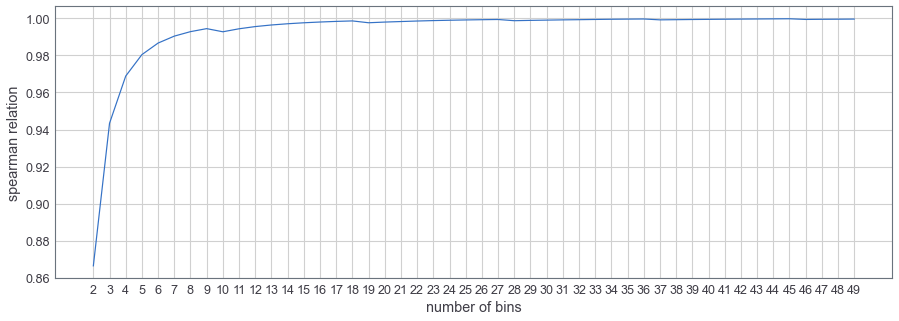

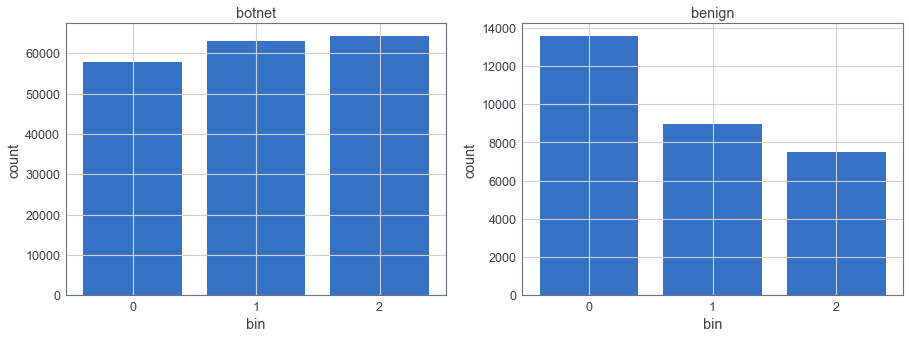

CTU-13 scenarios 10


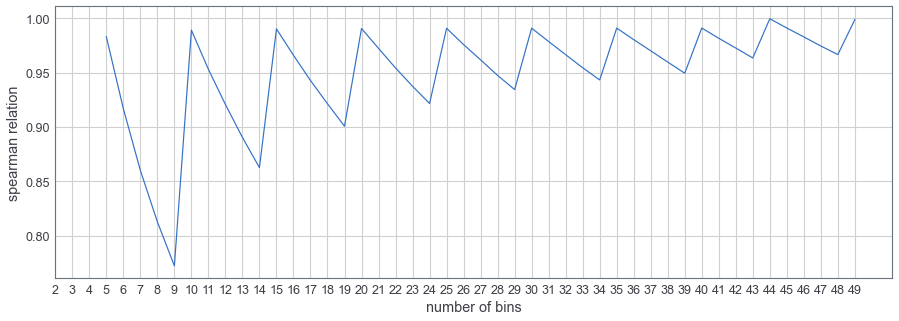

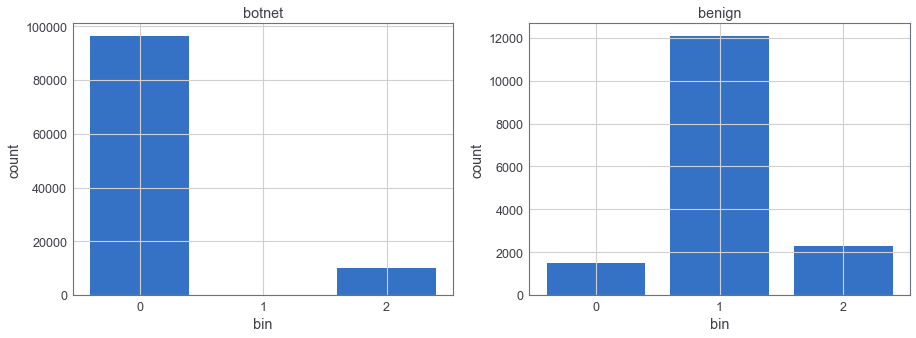

CTU-13 scenarios 11


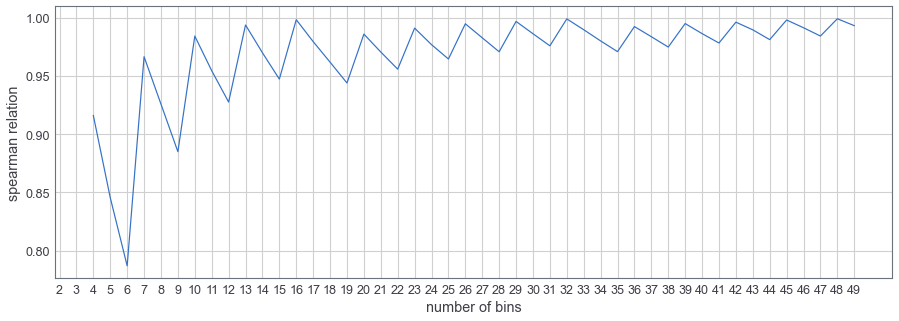

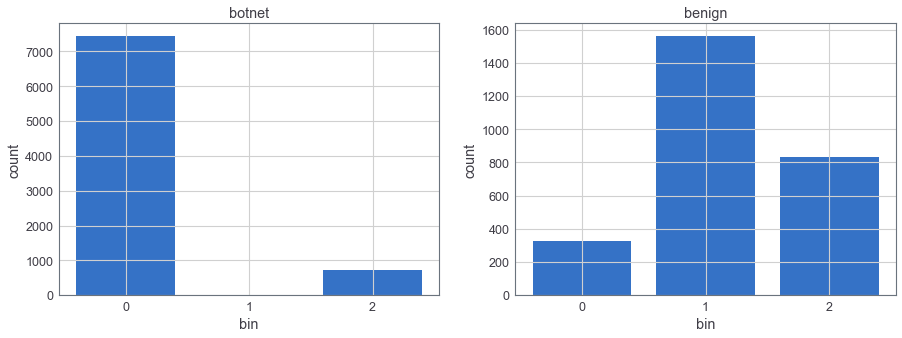

CTU-13 scenarios 12


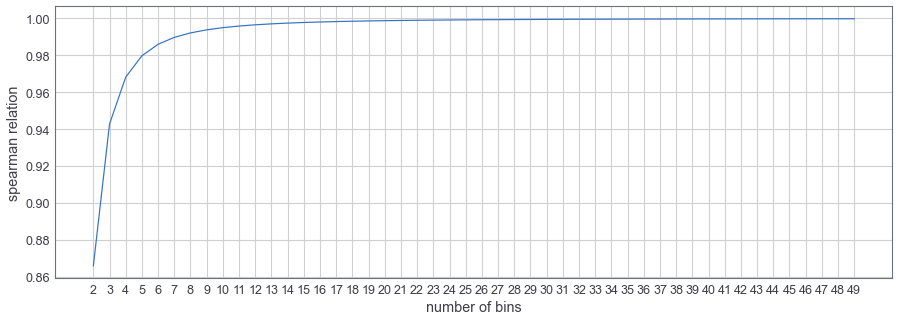

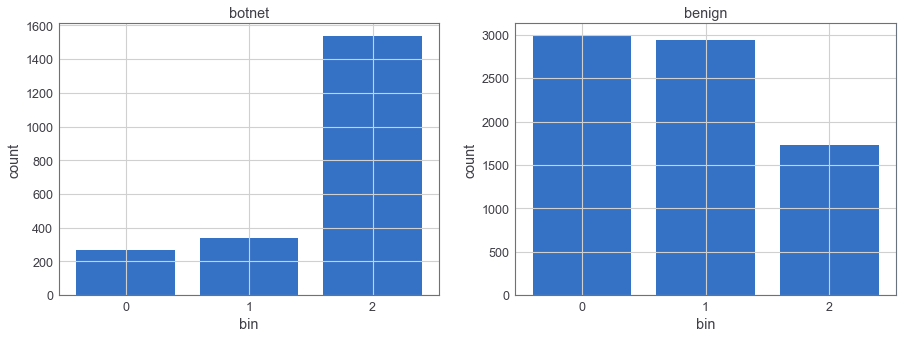

In [36]:
# load data
raw_source9 = pd.read_csv('./dataset/dataset_9/capture20110817.binetflow')
raw_source10 = pd.read_csv('./dataset/dataset_10/capture20110818.binetflow')
raw_source11 = pd.read_csv('./dataset/dataset_11/capture20110818-2.binetflow')
raw_source12 = pd.read_csv('./dataset/dataset_12/capture20110819.binetflow')

# preprocessing
print("CTU-13 scenarios 9")
source9 = discretization(raw_source9, quantile=3, plot=True, sel=9)
print("CTU-13 scenarios 10")
source10 = discretization(raw_source10, quantile=10, plot=True, sel=10)
print("CTU-13 scenarios 11")
source11 = discretization(raw_source11, quantile=7, plot=True, sel=11)
print("CTU-13 scenarios 12")
source12 = discretization(raw_source12, quantile=3, plot=True, sel=12)

In [37]:
# Extract features, source IPs and label
new_source9 = aggregation(source9)
new_source10 = aggregation(source10)
new_source11 = aggregation(source11)
new_source12 = aggregation(source12)

In [38]:
# counting
count_gram(new_source9)
count_gram(new_source10)
count_gram(new_source11)
count_gram(new_source12)

#### Prediction
selected_infected_host = '147.32.84.165'

In [39]:
# using cosine distance
new_source9["Distance"] = cosine_dist(new_source9, '147.32.84.165')
new_source10["Distance"] = cosine_dist(new_source10, '147.32.84.165')
new_source11["Distance"] = cosine_dist(new_source11, '147.32.84.165')
new_source12["Distance"] = cosine_dist(new_source12, '147.32.84.165')

In [40]:
# threshold = the mean of the distance
# we expect that the IPs with a distance larger than the mean is the benign ones
# and the IPs with distance less than the mean is the infected ones/botnets
new_source9["Prediction"] = botnet_pred(new_source9)
new_source10["Prediction"] = botnet_pred(new_source10)
new_source11["Prediction"] = botnet_pred(new_source11)
new_source12["Prediction"] = botnet_pred(new_source12)

#### Evaluation

Scenario 9


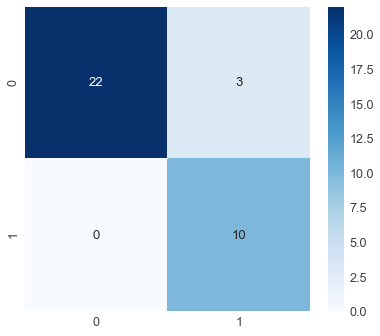

In [41]:
print("Scenario 9")
result9 = confusion_matrix(new_source9.Label.values, new_source9.Prediction.values)
sns.heatmap(result9, annot=True, cmap='Blues')
plt.show()

Scenario 10


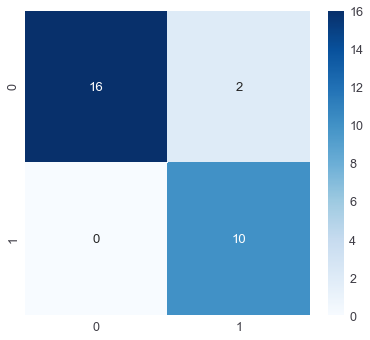

In [42]:
print("Scenario 10")
result10 = confusion_matrix(new_source10.Label.values, new_source10.Prediction.values)
sns.heatmap(result10, annot=True, cmap='Blues')
plt.show()

Scenario 11


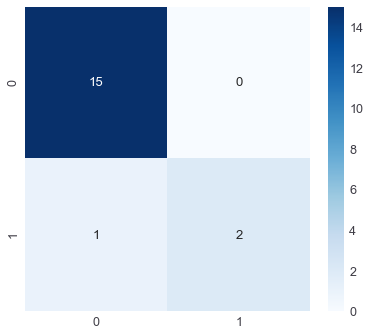

In [43]:
print("Scenario 11")
result11 = confusion_matrix(new_source11.Label.values, new_source11.Prediction.values)
sns.heatmap(result11, annot=True, cmap='Blues')
plt.show()

Scenario 12


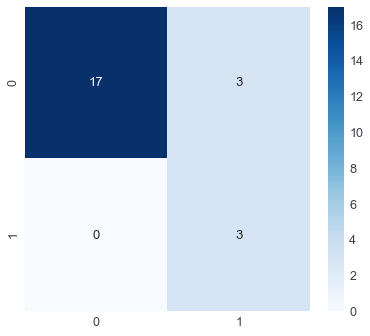

In [44]:
print("Scenario 12")
result12 = confusion_matrix(new_source12.Label.values, new_source12.Prediction.values)
sns.heatmap(result12, annot=True, cmap='Blues')
plt.show()

### 6b. Analysis and answers to the questions.

## 7.Botnet fingerprinting task – 1/2 A4

### 7a. Fingerprinting


### 7b. Analysis and answers to the questions.

## 8. Bonus Task 1/2 A4

In [45]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from tqdm import tqdm

In [46]:
def smote(X,y):
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X, y)
    return X_res, y_res

Botnet = [
    "147.32.84.165", "147.32.84.191", "147.32.84.192", "147.32.84.193",
    "147.32.84.204", "147.32.84.205", "147.32.84.206", "147.32.84.207",
    "147.32.84.208", "147.32.84.209"
]

### 8a. Provide implementation and analysis.

In [47]:
# load data
raw_source9 = pd.read_csv('./dataset/dataset_9/capture20110817.binetflow')
raw_source10 = pd.read_csv('./dataset/dataset_10/capture20110818.binetflow')
raw_source11 = pd.read_csv('./dataset/dataset_11/capture20110818-2.binetflow')
raw_source12 = pd.read_csv('./dataset/dataset_12/capture20110819.binetflow')

source_list = [raw_source9, raw_source10, raw_source11, raw_source12]

encoder_list = []
# preprocessing: pruning, Labelling, fillna, encoding
for i in tqdm(range(len(source_list))):
    enc = OrdinalEncoder()
    source_list[i] = source_list[i][~(source_list[i]).Label.str.contains("Background")] # background flows removed
    source_list[i].drop(columns = ["StartTime"], inplace=True) # drop timestamp
    source_list[i]["Botnet"] = source_list[i]['SrcAddr'].isin(Botnet) # tag
    source_list[i].drop(columns = ['SrcAddr'], inplace=True) # drop cheat feature
    for col in source_list[i].columns: # fill NAN
        if(type(source_list[i][col].values[0]) == str):
            source_list[i][col].fillna(value="unknown", inplace=True)
        else:
            source_list[i][col].fillna(value=source_list[i][col].mean(), inplace=True)
    source_list[i] = enc.fit_transform(source_list[i])
    encoder_list.append(enc)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.48it/s]


In [48]:
X = []
y = []
for i in range(len(source_list)):
    X.append(source_list[i][:, :-1])
    y.append(source_list[i][:, -1])

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:34<00:00,  8.58s/it]


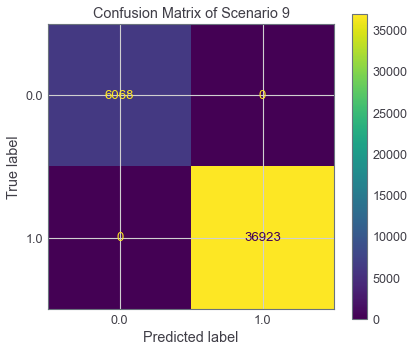

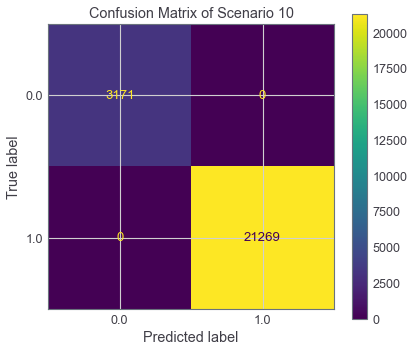

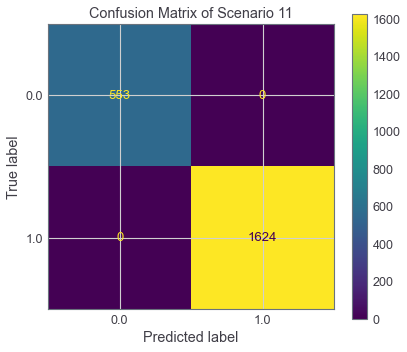

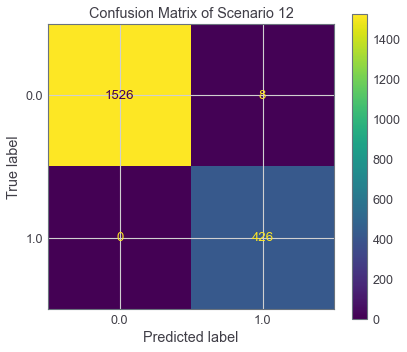

In [49]:
rf = RandomForestClassifier(n_estimators=200, max_depth=3)
for i in tqdm(range(len(source_list))):
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X[i],
                                                        y[i],
                                                        test_size=0.2,
                                                        random_state=42)
    # smote
    X_train_smote, y_train_smote = smote(X_train, y_train)
    rf.fit(X_train_smote, y_train_smote)
    plot_confusion_matrix(rf, X_test, y_test)
    plt.title('Confusion Matrix of Scenario ' + str(9 + i))
plt.show()